# Analyzing tweets to compare the popularity of 3 programming languages: Python, Javascript and ruby


Reference: http://adilmoujahid.com/posts/2014/07/twitter-analytics/

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import re

pd.set_option('display.max_rows', 20, 
              'display.max_columns', 100, 
              'display.float_format', '{:,.2f}'.format)

In [2]:
def word_in_text(word, text):
    word = word.lower()
    text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

In [3]:
def extract_link(text):
    regex = r'https?://[^\s<>"]+|www\.[^\s<>"]+'
    match = re.search(regex, text)
    if match:
        return match.group()
    return ''

In [4]:
#Reading Tweets
print ('Reading Tweets\n')
import requests
url ='https://github.com/lukkiddd/practice_textmining_hbase_cassandra/raw/master/twitter_data.txt'
tweets_file  = requests.get(url)

tweets_data = []
#tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

Reading Tweets



In [7]:
print(tweets_data)

[{'url': 'http://t.co/UisGFuWsMD', 'expanded_url': 'http://prsm.tc/4Tjtqj', 'display_url': 'prsm.tc/4Tjtqj', 'indices': [85, 107]}]


In [5]:
#Structuring Tweets
print ('Structuring Tweets\n')
tweets = pd.DataFrame()
tweets['text'] = map(lambda tweet: tweet['text'], tweets_data)
tweets['lang'] = map(lambda tweet: tweet['lang'], tweets_data)
tweets['country'] = map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data)

Structuring Tweets



KeyError: 'text'

# Text Mining ด้วย Twitter Streaming API และ Python

- https://github.com/lukkiddd/practice_textmining_hbase_cassandra
- https://lukkiddd.com/%E0%B8%A5%E0%B8%AD%E0%B8%87%E0%B8%97%E0%B8%B3-text-mining-%E0%B8%94%E0%B9%89%E0%B8%A7%E0%B8%A2-twitter-streaming-api-%E0%B9%81%E0%B8%A5%E0%B8%B0-python-f5f11ad3d3d6

In [8]:
a = 'Text Mining  Twitter Streaming API  Pyt'
a.lower()

'text mining  twitter streaming api  pyt'

In [9]:

import json
import pandas as pd
import matplotlib.pyplot as plt
import re

%matplotlib inline

In [10]:
tweets_data_path = 'data/twitter_data.txt'

tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue

In [11]:
print (len(tweets_data))

4807


In [12]:
print(tweets_data[100])

{'created_at': 'Tue Sep 22 11:53:13 +0000 2015', 'id': 646291155697557504, 'id_str': '646291155697557504', 'text': '@ole6690 cassandra~ Cinta Terbaik #LaguBuatBaale\n#mumpungorangnyatidur', 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'truncated': False, 'in_reply_to_status_id': None, 'in_reply_to_status_id_str': None, 'in_reply_to_user_id': 628682037, 'in_reply_to_user_id_str': '628682037', 'in_reply_to_screen_name': 'ole6690', 'user': {'id': 1014807824, 'id_str': '1014807824', 'name': 'claudya oktavyane', 'screen_name': 'claudyaoktavyan', 'location': 'Bekasi Selatan, West Java', 'url': 'http://instagram.com/claudyoktavyane', 'description': 'Tikarpala#Jaya | CJRisCJR ♥', 'protected': False, 'verified': False, 'followers_count': 297, 'friends_count': 280, 'listed_count': 0, 'favourites_count': 461, 'statuses_count': 9396, 'created_at': 'Sun Dec 16 09:10:08 +0000 2012', 'utc_offset': -25200, 'time_zone': 'Pacific Time (US & Canada)', 

In [13]:
tweets_data[0]

{'created_at': 'Tue Sep 22 10:57:43 +0000 2015',
 'id': 646277187914436608,
 'id_str': '646277187914436608',
 'text': 'spark times out when connecting to cassandra: I have a lot of data in cassandra cluster with 2 node machines a... http://t.co/worTGhLMvN',
 'source': '<a href="http://twitterfeed.com" rel="nofollow">twitterfeed</a>',
 'truncated': False,
 'in_reply_to_status_id': None,
 'in_reply_to_status_id_str': None,
 'in_reply_to_user_id': None,
 'in_reply_to_user_id_str': None,
 'in_reply_to_screen_name': None,
 'user': {'id': 2976522568,
  'id_str': '2976522568',
  'name': 'Spark@Stackoverflow',
  'screen_name': 'SparkAtSO',
  'location': '',
  'url': None,
  'description': 'Apache Spark questions on StackOverflow. Run by @huitseeker',
  'protected': False,
  'verified': False,
  'followers_count': 122,
  'friends_count': 0,
  'listed_count': 13,
  'favourites_count': 0,
  'statuses_count': 5093,
  'created_at': 'Tue Jan 13 14:16:58 +0000 2015',
  'utc_offset': None,
  'time_zon

In [14]:
len(tweets_data)

4807

In [15]:
dic_tweets = {}
for i in range(len(tweets_data)):
    dic_tweets.update({ i : [tweets_data[i]['text'],tweets_data[i]['lang'] ]})
dic_tweets

{0: ['spark times out when connecting to cassandra: I have a lot of data in cassandra cluster with 2 node machines a... http://t.co/worTGhLMvN',
  'en'],
 1: ["j'suis au foyer avec Cassandra et Sarah", 'fr'],
 2: ['RT @jose_garde: Big Data on vSphere with HBase - VMware vSphere Blog - http://t.co/aDIf6gqHTq #BigData',
  'en'],
 3: ["RT @ngmzl: j'suis au foyer avec Cassandra et Sarah", 'fr'],
 4: ['Cinta Terbaik by Cassandra — https://t.co/Y0nJiyRs3P', 'in'],
 5: ['RT @WZC_OFFICIAL: 白塗りオムニバス｢白い群集｣\n2016年1月発売\n参加バンド\nリトルツイスターズ\n霞鳥幻樂団\n侍NEWWAVE\n白病\nイビルキック\n空想革命\n毒殺テロリスト\n燭台（怪）\nCASSANDRA\nWhite Z Company\nUNITED MON…',
  'ja'],
 6: ['RT @cassandrasleee: Hiii guysss baca my berita baru exclusive interview w http://t.co/4cg8eWbmRn       @detikhot  http://t.co/6uGzaOrt49 ht…',
  'en'],
 7: ['RT @MajalahGirls: Cassandra Lee akan main film baru http://t.co/I96OSzjeFe',
  'in'],
 8: ['Read This Book http://t.co/nDKeiE8hux #3381 CITY OF BONES, BOOK 1  -Cassandra Clare-  UNABRIDGED AUDIO 12 CD ~

In [18]:
#initialize list of lists 

data = [['tom', 10], ['nick', 15], ['juli', 14]] 
  
# Create the pandas DataFrame 
df = pd.DataFrame(data, columns = ['Name', 'Age']) 

In [19]:

for i in range(len(tweets_data)):
    
    db.append({'text': tweets_data.text[i],'lang':tweets_data.lang[i],'country':tweets_data.country[i]  })
    
db


NameError: name 'db' is not defined

In [64]:
import json 
  
  
# the file to be converted 
filename = 'data/twitter_data.txt'
  
# intermediate and resultant dictionaries 
# intermediate 
dict2 = {} 
  
# resultant 
dict1 = {} 
  
# fields in the sample file  
fields =['text', 'lang', 'country'] 
  
with open(filename) as fh: 
      
    # loop variable 
    i = 0
      
    # count variable for employee id creation 
    l = 1
      
    for line in fh: 
          
        # reading line by line from the text file 
        description = list( line.strip().split(None, 4)) 
          
        # for output see below 
        print(description)  
          
        # for automatic creation of id for each employee 
        sno ='emp'+str(l) 
      
        while i<len(fields): 
              
                # creating dictionary for each employee 
                dict2[fields[i]]= description[i] 
                i = i + 1
                  
        # appending the record of each employee to 
        # the main dictionary 
        dict1[sno]= dict2 
        l = l + 1
  
  
# creating json file         
tweets = open("test2.json", "w") 
json.dump(dict1, out_file, indent = 4) 
out_file.close() 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



ValueError: I/O operation on closed file.

## สร้าง DataFrame ด้วย pandas

In [62]:
# Create a table(dataframe) by pandas library
tweets = pd.DataFrame()

# Create 3 columns consist of text, lang, and country 
tweets['text'] = map(lambda tweet: tweet['text'], tweets_data)
tweets['lang'] = map(lambda tweet: tweet['lang'], tweets_data)
tweets['country'] = map(lambda tweet: tweet['place']['country'] if tweet['place'] != None else None, tweets_data)

In [63]:
tweets

,text,lang,country
0,<map object at 0x00000160234FC470>,<map object at 0x00000160234FC7B8>,<map object at 0x00000160234FCBA8>
1,<map object at 0x00000160234FC470>,<map object at 0x00000160234FC7B8>,<map object at 0x00000160234FCBA8>
2,<map object at 0x00000160234FC470>,<map object at 0x00000160234FC7B8>,<map object at 0x00000160234FCBA8>
3,<map object at 0x00000160234FC470>,<map object at 0x00000160234FC7B8>,<map object at 0x00000160234FCBA8>
4,<map object at 0x00000160234FC470>,<map object at 0x00000160234FC7B8>,<map object at 0x00000160234FCBA8>
5,<map object at 0x00000160234FC470>,<map object at 0x00000160234FC7B8>,<map object at 0x00000160234FCBA8>
6,<map object at 0x00000160234FC470>,<map object at 0x00000160234FC7B8>,<map object at 0x00000160234FCBA8>
7,<map object at 0x00000160234FC470>,<map object at 0x00000160234FC7B8>,<map object at 0x00000160234FCBA8>
8,<map object at 0x00000160234FC470>,<map object at 0x00000160234FC7B8>,<map object at 0x00000160234FCBA8>
9,<map object at 0x00000160234FC470>,<map object at 0x00000160234FC7B8>,<map object at 0x00000160234FCBA8>


In [55]:
from sklearn.feature_extraction.text import CountVectorizer
desc =tweets.iloc[:]['text'].values

#CountVectorizer ทำ tokenize

vect = CountVectorizer(stop_words='english', lowercase=True)
vect

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [56]:
#เริ่มตัดคำ

count_train = vect.fit(desc)
count_train

AttributeError: 'map' object has no attribute 'lower'

## ตรวจสอบว่ามีภาษาอะไรบ้าง

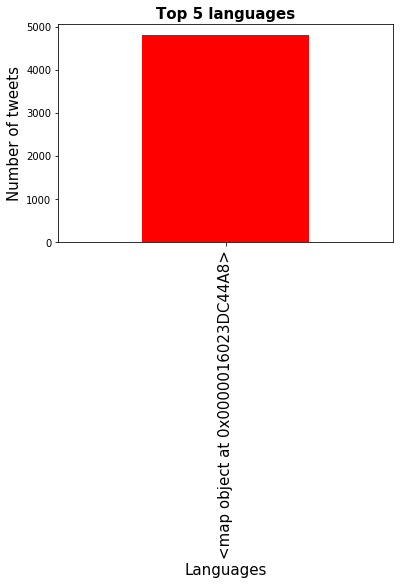

In [41]:
tweets_by_lang = tweets['lang'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Languages', fontsize=15)
ax.set_ylabel('Number of tweets' , fontsize=15)
ax.set_title('Top 5 languages', fontsize=15, fontweight='bold')
tweets_by_lang[:5].plot(ax=ax, kind='bar', color='red')
plt.show()

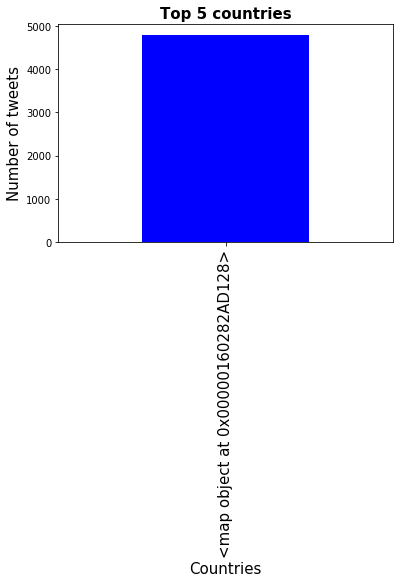

In [42]:
# Classify by country
tweets_by_country = tweets['country'].value_counts()

fig, ax = plt.subplots()
ax.tick_params(axis='x', labelsize=15)
ax.tick_params(axis='y', labelsize=10)
ax.set_xlabel('Countries', fontsize=15)
ax.set_ylabel('Number of tweets', fontsize=15)
ax.set_title('Top 5 countries', fontsize=15, fontweight='bold')
tweets_by_country[:5].plot(ax=ax, kind='bar', color='blue')
plt.show()

In [46]:
import re

def word_in_text(word, text):
    word = word.lower()
    #text = text.lower()
    match = re.search(word, text)
    if match:
        return True
    return False

In [47]:
tweets['python'] = tweets['text'].apply(lambda tweet: word_in_text('python', tweet))
tweets['javascript'] = tweets['text'].apply(lambda tweet: word_in_text('javascript', tweet))
tweets['ruby'] = tweets['text'].apply(lambda tweet: word_in_text('ruby', tweet))

TypeError: expected string or bytes-like object

In [29]:
# Add 2 columns in DataFrame
tweets['hbase'] = tweets['text'].apply(lambda tweet: word_in_text('hbase', tweet))
tweets['cassandra'] = tweets['text'].apply(lambda tweet: word_in_text('cassandra', tweet))

TypeError: expected string or bytes-like object